In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
! ls gdrive/MyDrive

'AI Foundations in Practice'				        flower_photos.zip
'Colab Notebooks'					        test_set.zip
'Colab Notebooks for "Programming for Data Analytics and AI"'   traffic.zip


In [4]:
!unzip gdrive/MyDrive/traffic.zip

Archive:  gdrive/MyDrive/traffic.zip
   creating: traffic/
   creating: traffic/Red/
  inflating: traffic/Red/000803.jpg  
  inflating: traffic/Red/000806.jpg  
  inflating: traffic/Red/000856.jpg  
  inflating: traffic/Red/000865.jpg  
  inflating: traffic/Red/000867.jpg  
  inflating: traffic/Red/000873.jpg  
  inflating: traffic/Red/000878.jpg  
  inflating: traffic/Red/000879.jpg  
  inflating: traffic/Red/000882.jpg  
  inflating: traffic/Red/000892.jpg  
  inflating: traffic/Red/000896.jpg  
  inflating: traffic/Red/000903.jpg  
  inflating: traffic/Red/000905.jpg  
  inflating: traffic/Red/000911.jpg  
  inflating: traffic/Red/000916.jpg  
  inflating: traffic/Red/000920.jpg  
  inflating: traffic/Red/000928.jpg  
  inflating: traffic/Red/000951.jpg  
  inflating: traffic/Red/002579.jpg  
  inflating: traffic/Red/000000.jpg  
  inflating: traffic/Red/000001.jpg  
  inflating: traffic/Red/000002.jpg  
  inflating: traffic/Red/000008.jpg  
  inflating: traffic/Red/000014.jpg  
  i

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [6]:
X=[]
Z=[]
IMG_SIZE=150
LIGHT_GREEN_DIR = '/content/traffic/Green'
LIGHT_RED_DIR = '/content/traffic/Red'

In [7]:
def assign_label(img,traffic_type):
    return traffic_type

In [8]:
def make_train_data(traffic_type,DIR):
    for img in os.listdir(DIR):
        print('print DIR:' ,DIR)
        #print('print listdir :' ,os.listdir(DIR))
        label=assign_label(img,traffic_type)
        path = os.path.join(DIR,img)
        print(path)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))

In [9]:
make_train_data('Green', LIGHT_GREEN_DIR)

print DIR: /content/traffic/Green
/content/traffic/Green/000015.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000406.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000364.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000049.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000105.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000165.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000182.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000196.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000485.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000449.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000597.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000431.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000391.jpg
print DIR: /content/traffic/Green
/content/traffic/Green/000162.jpg
print DIR: /content/traffic/Green
/content/traff

In [10]:
make_train_data('Red', LIGHT_RED_DIR)

print DIR: /content/traffic/Red
/content/traffic/Red/000102.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000928.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000865.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000903.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000037.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000167.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000570.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000370.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000421.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000505.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000920.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/001742.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000354.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000806.jpg
print DIR: /content/traffic/Red
/content/traffic/Red/000800.jpg
print DIR: /content/traffic/Red
/content

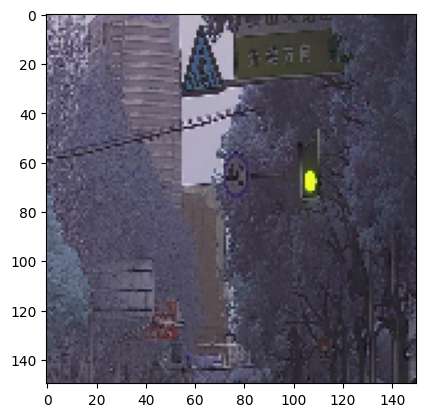

In [11]:
plt.imshow(X[1])

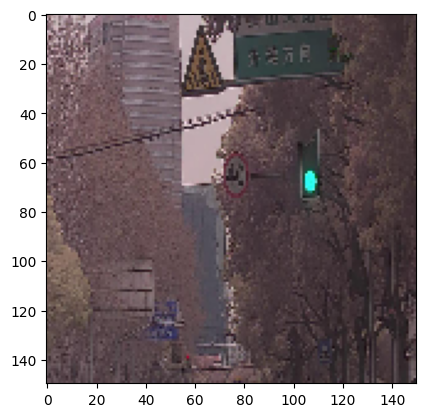

In [12]:
plt.imshow(X[1][:,:,::-1])

In [13]:
le=LabelEncoder()
print(Z)
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
print(Y)
X=np.array(X)
X=X/255

['Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', '

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
x_train.shape
x_test.shape

(40, 150, 150, 3)

In [15]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(150,
                                  150,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(32, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(96, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(96, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(5, activation = "softmax")
])


In [17]:
model.compile(optimizer='Adam',loss='CategoricalCrossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7776)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,981,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,143,749 (15.81 MB)

 Trainable params: 4,143,749 (15.81 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
History = model.fit(x_train,y_train,  epochs = 50, validation_split=0.1)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 207ms/step - accuracy: 0.3015 - loss: 1.3468 - val_accuracy: 0.5625 - val_loss: 1.1188
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4745 - loss: 0.9437 - val_accuracy: 0.4375 - val_loss: 0.8516
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4809 - loss: 0.8248 - val_accuracy: 0.4375 - val_loss: 0.7579
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5178 - loss: 0.7129 - val_accuracy: 0.6875 - val_loss: 0.6784
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5165 - loss: 0.7392 - val_accuracy: 0.4375 - val_loss: 0.6985
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6199 - loss: 0.6739 - val_accuracy: 0.5625 - val_loss: 0.6861
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5152 - loss: 0.7067 - val_accuracy: 0.5000 - val_loss: 0.6846
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4936 - loss: 0.7078 - val_accuracy: 0.4375 - val_loss: 0.7257

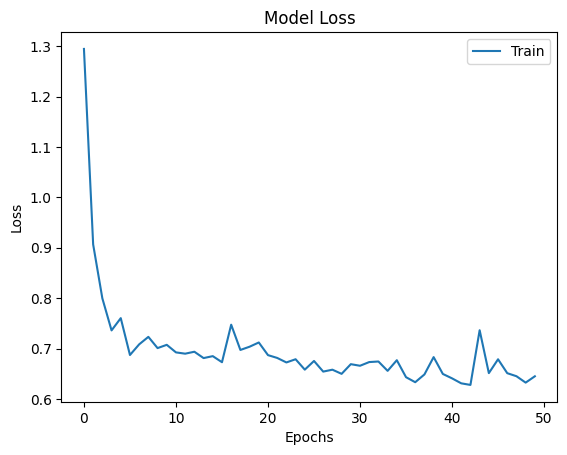

In [20]:
plt.plot(History.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train'])
plt.show()

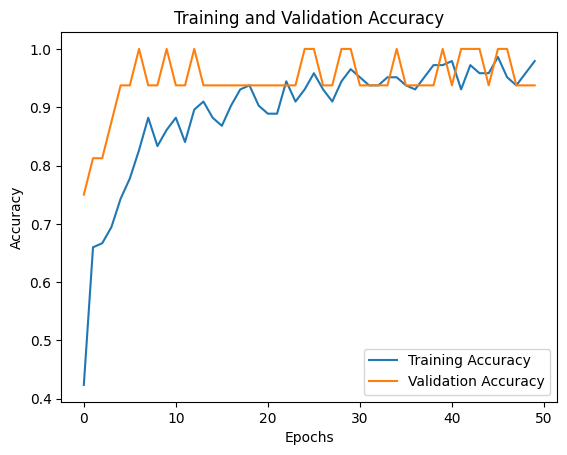

In [31]:
plt.plot(History.history['accuracy'],label='Training Accuracy')
plt.plot(History.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.5917 - loss: 0.6427
[0.6523702144622803, 0.574999988079071]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
predicted label is  1


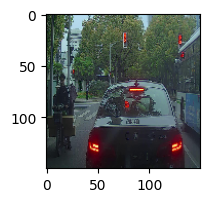

In [22]:
loss_metric=model.evaluate(x_test,y_test)
print(loss_metric)
image_number =12
plt.figure(figsize=(2,2))
plt.imshow(x_test[image_number][:,:,::-1])
predicted_label = pred = model.predict(x_test[image_number].reshape(1, 150, 150, 3))
print('predicted label is ',predicted_label.argmax())

Improvement Steps (VGG)

In [23]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
for layer in conv_base.layers:
    layer.trainable = False
model_vgg = Sequential()
model_vgg.add(conv_base)
model_vgg.add(Flatten())
model_vgg.add(Dense(32, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(5, activation = "softmax"))
model_vgg.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [25]:
model_vgg.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,977,029 (57.13 MB)

 Trainable params: 262,341 (1.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [26]:
History = model_vgg.fit(x_train,y_train,  epochs = 50, validation_split=0.1)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.3387 - loss: 1.6385 - val_accuracy: 0.7500 - val_loss: 0.5730
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.6769 - loss: 0.8650 - val_accuracy: 0.8125 - val_loss: 0.5141
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.6076 - loss: 0.8088 - val_accuracy: 0.8125 - val_loss: 0.4780
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6963 - loss: 0.7385 - val_accuracy: 0.8750 - val_loss: 0.3731
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7433 - loss: 0.5796 - val_accuracy: 0.9375 - val_loss: 0.3014
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7753 - loss: 0.5480 - val_accuracy: 0.9375 - val_loss: 0.2844
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8527 - loss: 0.4377 - val_accuracy: 1.0000 - val_loss: 0.2350
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.8955 - loss: 0.4050 - val_accuracy: 0.9375 - val_loss: 0.2091
E

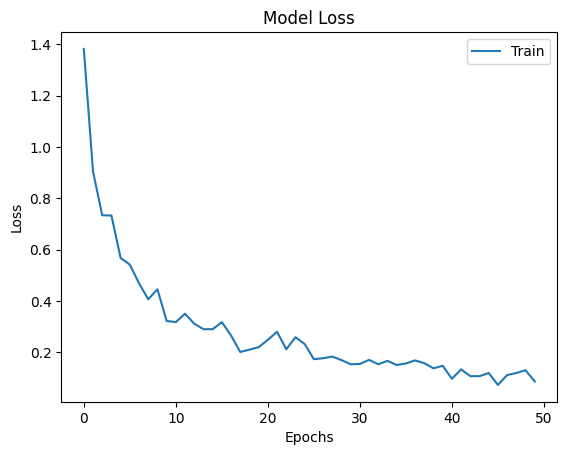

In [27]:
plt.plot(History.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train'])
plt.show()

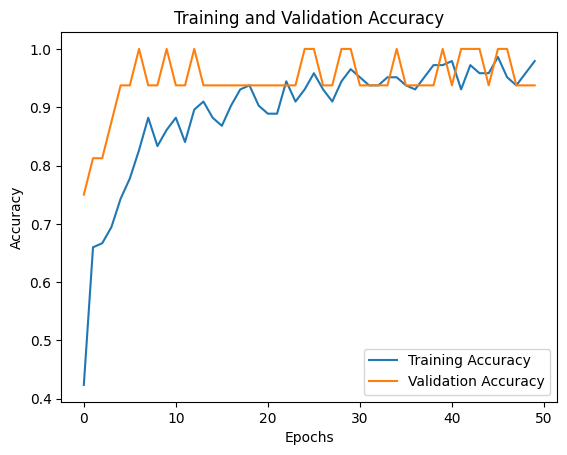

In [28]:
plt.plot(History.history['accuracy'],label='Training Accuracy')
plt.plot(History.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8375 - loss: 0.6589 
[0.614279568195343, 0.8500000238418579]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
predicted label is  1


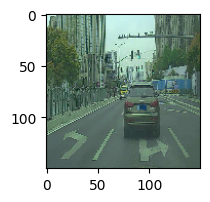

In [37]:
loss_metric=model_vgg.evaluate(x_test,y_test)
print(loss_metric)
image_number =10
plt.figure(figsize=(2,2))
plt.imshow(x_test[image_number][:,:,::-1])
predicted_label = pred = model.predict(x_test[image_number].reshape(1, 150, 150, 3))
print('predicted label is ',predicted_label.argmax())

Training with batch_size=16, epochs=10, learning_rate=0.001
Validation Accuracy: 0.7250000238418579
Training with batch_size=16, epochs=10, learning_rate=0.0001
Validation Accuracy: 0.574999988079071
Training with batch_size=16, epochs=20, learning_rate=0.001
Validation Accuracy: 0.625
Training with batch_size=16, epochs=20, learning_rate=0.0001
Validation Accuracy: 0.574999988079071
Training with batch_size=32, epochs=10, learning_rate=0.001
Validation Accuracy: 0.5
Training with batch_size=32, epochs=10, learning_rate=0.0001
Validation Accuracy: 0.550000011920929
Training with batch_size=32, epochs=20, learning_rate=0.001
Validation Accuracy: 0.574999988079071
Training with batch_size=32, epochs=20, learning_rate=0.0001
Validation Accuracy: 0.550000011920929
Training with batch_size=64, epochs=10, learning_rate=0.001
Validation Accuracy: 0.4749999940395355
Training with batch_size=64, epochs=10, learning_rate=0.0001
Validation Accuracy: 0.5
Training with batch_size=64, epochs=20, lea

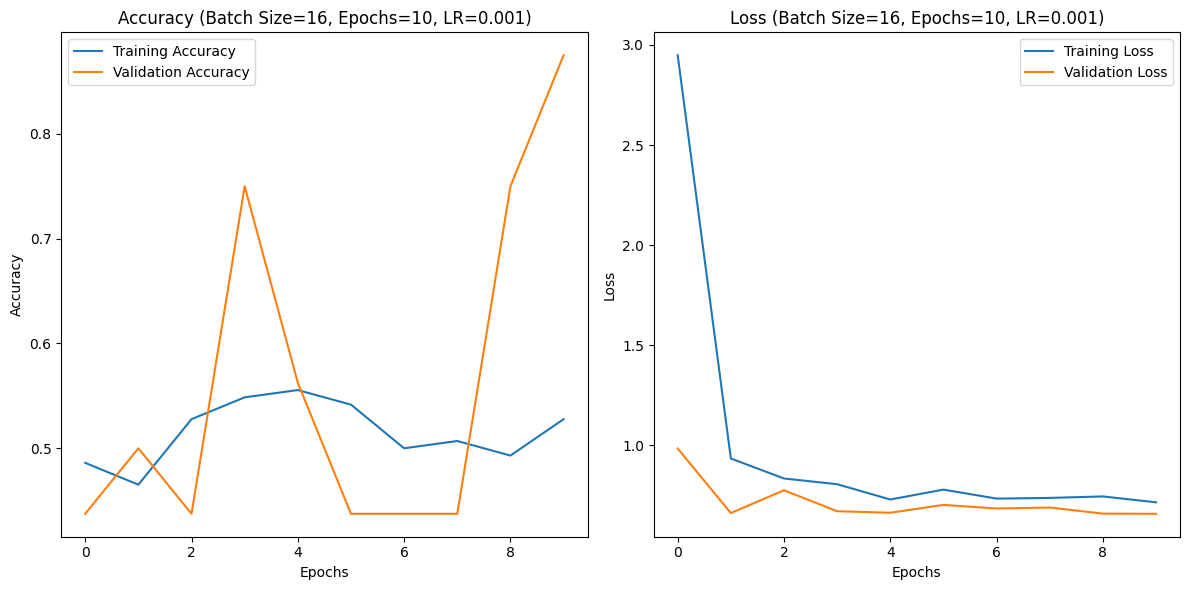

In [39]:
# Storing the best accuracy, parameters, and history
best_accuracy = 0
best_params = {}
best_history = None

for batch_size in param_grid['batch_size']:
    for epochs in param_grid['epochs']:
        for learning_rate in param_grid['learning_rate']:
            print(f"Training with batch_size={batch_size}, epochs={epochs}, learning_rate={learning_rate}")
            model = build_model(learning_rate)
            history = model.fit(
                x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_split=0.1,
                verbose=0
            )
            accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
            print(f"Validation Accuracy: {accuracy}")
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    "batch_size": batch_size,
                    "epochs": epochs,
                    "learning_rate": learning_rate
                }
                best_history = history  # Save the history of the best model

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

# Plotting training and validation loss and accuracy for the best configuration
if best_history:
    plt.figure(figsize=(12, 6))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(best_history.history['accuracy'], label='Training Accuracy')
    plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Accuracy (Batch Size={best_params['batch_size']}, Epochs={best_params['epochs']}, LR={best_params['learning_rate']})")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(best_history.history['loss'], label='Training Loss')
    plt.plot(best_history.history['val_loss'], label='Validation Loss')
    plt.title(f"Loss (Batch Size={best_params['batch_size']}, Epochs={best_params['epochs']}, LR={best_params['learning_rate']})")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
